In [34]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [35]:
#collecting the path for base directory
base_dir=r'C:\Users\User\Documents\ADA\CSCI4734_2024S_20252_PROJECT_TEAM11\dataset'
training_dir=os.path.join(base_dir, 'training')
validation_dir=os.path.join(base_dir, 'validation')

train_b_dir=os.path.join(training_dir,'bengal')
train_ds_dir=os.path.join(training_dir,'domestic_shorthair')
train_mc_dir=os.path.join(training_dir,'maine_coon')
train_r_dir=os.path.join(training_dir,'ragdoll')
train_s_dir=os.path.join(training_dir,'siamese')


valid_b_dir=os.path.join(validation_dir,'bengal')
valid_ds_dir=os.path.join(validation_dir,'domestic_shorthair')
valid_mc_dir=os.path.join(validation_dir,'maine_coon')
valid_r_dir=os.path.join(validation_dir,'ragdoll')
valid_s_dir=os.path.join(validation_dir,'siamese')


#Let's find out the total number of images in the directories:
print('total bengal in training: ', len(os.listdir(train_b_dir)))
print('total domestic shorthair in training: ', len(os.listdir(train_ds_dir)))
print('total maine coon in training: ', len(os.listdir(train_mc_dir)))
print('total ragdoll in training: ', len(os.listdir(train_r_dir)))
print('total siamese in training: ', len(os.listdir(train_s_dir)))


print('total bengal in validation: ', len(os.listdir(valid_b_dir)))
print('total domestic shorthair in validation: ', len(os.listdir(valid_ds_dir)))
print('total maine coon in validation: ', len(os.listdir(valid_mc_dir)))
print('total ragdoll in validation: ', len(os.listdir(train_r_dir)))
print('total siamese in validation: ', len(os.listdir(valid_s_dir)))


total bengal in training:  97
total domestic shorthair in training:  91
total maine coon in training:  107
total ragdoll in training:  120
total siamese in training:  120
total bengal in validation:  80
total domestic shorthair in validation:  79
total maine coon in validation:  83
total ragdoll in validation:  120
total siamese in validation:  88


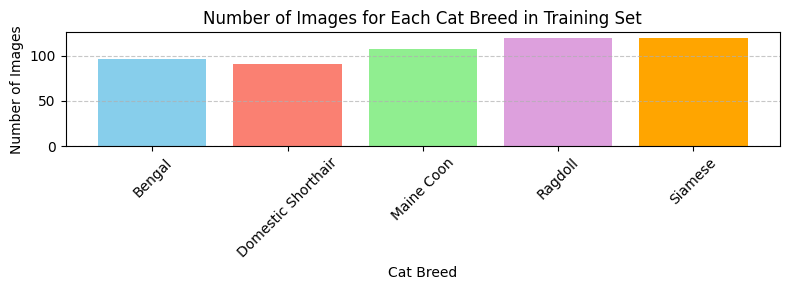

In [36]:

train_counts = [
    len(os.listdir(train_b_dir)),
    len(os.listdir(train_ds_dir)),
    len(os.listdir(train_mc_dir)),
    len(os.listdir(train_r_dir)),
    len(os.listdir(train_s_dir))
]


cat_labels = ['Bengal', 'Domestic Shorthair', 'Maine Coon', 'Ragdoll', 'Siamese']

colors = ['skyblue', 'salmon', 'lightgreen', 'plum', 'orange']

plt.figure(figsize=(8, 3))
plt.bar(cat_labels, train_counts, color=colors)
plt.xlabel('Cat Breed')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Cat Breed in Training Set')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:

train_b_names = os.listdir(train_b_dir)
print("Bengal training files:", train_b_names[:10])
train_ds_names = os.listdir(train_ds_dir)
print("Domestic Shorthair training files:", train_ds_names[:10])
train_mc_names = os.listdir(train_mc_dir)
print("Maine Coon training files:", train_mc_names[:10])
train_r_names = os.listdir(train_r_dir)
print("Ragdoll training files:", train_r_names[:10])
train_s_names = os.listdir(train_s_dir)
print("Siamese training files:", train_s_names[:10])


validation_b_names = os.listdir(valid_b_dir)
print("Bengal validation files:", validation_b_names[:10])
validation_ds_names = os.listdir(valid_ds_dir)
print("Domestic Shorthair validation files:", validation_ds_names[:10])
validation_mc_names = os.listdir(valid_mc_dir)
print("Maine Coon validation files:", validation_mc_names[:10])
validation_r_names = os.listdir(valid_r_dir)
print("Ragdoll validation files:", validation_r_names[:10])
validation_s_names = os.listdir(valid_s_dir)
print("Siamese validation files:", validation_s_names[:10])


Bengal training files: ['bengal-534185.jpg', 'bengal-556672.jpg', 'bengal-582741.jpeg', 'bengal-cat (1).jpg', 'Bengal-cat (2).jpg', 'bengal-cat-1331937.jpg', 'bengal-cat-1337628.jpg', 'bengal-cat-9.jpg', 'Bengal-Cat-Blog-Photo-003.jpg', 'Bengal-Cat-Blog-Photo-12080404.jpg']
Domestic Shorthair training files: ['046dce16530c0e2f62348adc724dbc4b.jpg', '04f2e5e2f67443c7c3299ce4078dc2a2.jpg', '0C40F888-7B22-4B2C-88B5-049BBB40E374.jpeg', '0cd53884802ed1f687f6ddb860973b8b.jpg', '10bc40c87f24b7442f454f90f1248e16.jpg', '1200-93358197-domestic-shorthair-cats-playing.jpg', '1200px-American_Shorthair.jpg', '1200px-Cat03.jpg', '1200x0 (1).jpg', '1200x0 (2).jpg']
Maine Coon training files: ['04451e0620bad89784005f3443dd7fed.jpg', '06a71c9902b7dcbb9f741d0599baf907.jpg', '098d3da3d30a35356744d87c57af4280.jpg', '11-25.jpg', '1280-491043662-tabby-maine-coon-cat.jpg', '14052241_f120.jpg', '14134300_f1024.jpg', '154d0dfcc8a953dc2adea273e02c0cb2.jpg', '1692_191118161233Q7_104.jpg', '17826-Maine-Coon-cat-wh

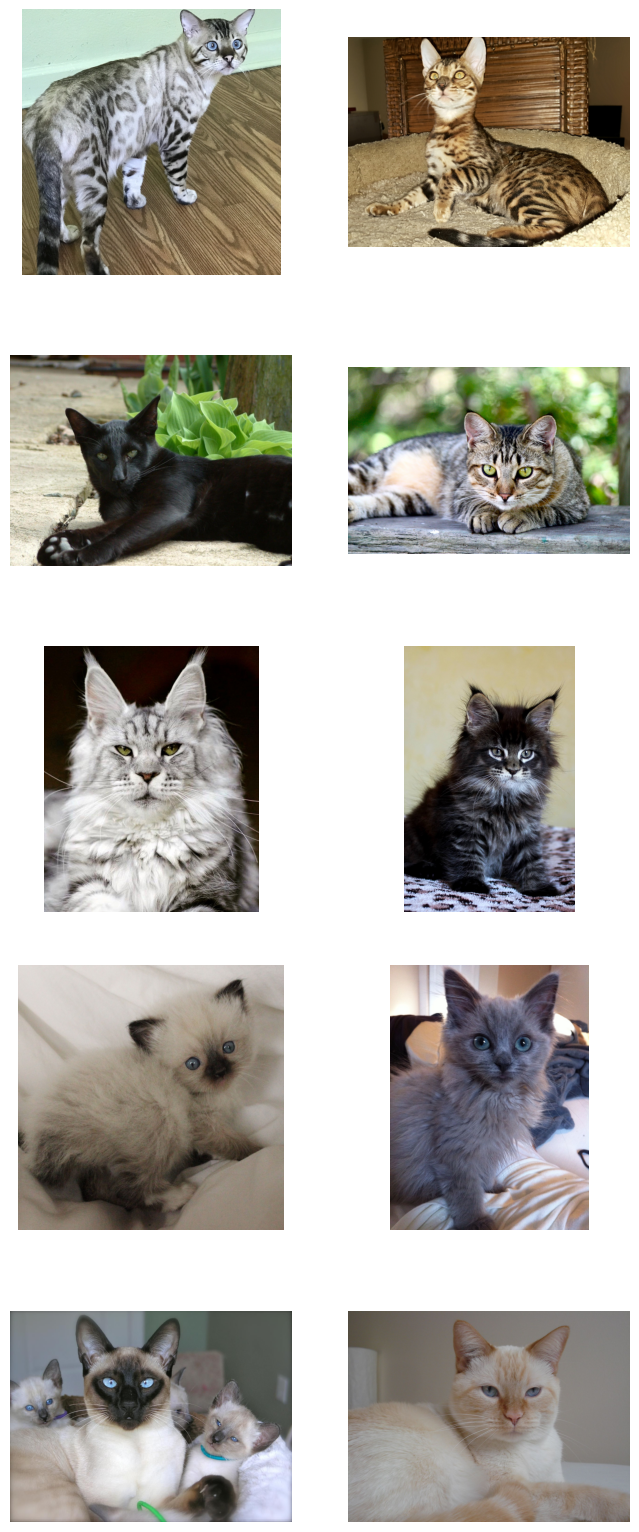

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

nrows = 5
ncols = 2


pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)



num_images_per_class = 2


next_b_pix = [os.path.join(train_b_dir, fname) 
                for fname in os.listdir(train_b_dir)[:num_images_per_class]]
next_ds_pix = [os.path.join(train_ds_dir, fname) 
                for fname in os.listdir(train_ds_dir)[:num_images_per_class]]
next_mc_pix = [os.path.join(train_mc_dir, fname) 
                for fname in os.listdir(train_mc_dir)[:num_images_per_class]]
next_r_pix = [os.path.join(train_r_dir, fname) 
                for fname in os.listdir(train_r_dir)[:num_images_per_class]]
next_s_pix = [os.path.join(train_s_dir, fname) 
                for fname in os.listdir(train_s_dir)[:num_images_per_class]]

for i, img_path in enumerate(next_b_pix + next_ds_pix + next_mc_pix +next_r_pix + next_s_pix):
    
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [39]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),


    # Output layer with 5 neurons for 5 classes and softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 48, 48, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 23, 23, 64)       

In [40]:
model.compile(optimizer = RMSprop(lr=1e-4),
              loss = 'categorical_crossentropy',metrics=['accuracy'])


In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
        training_dir,  
        target_size=(200, 200),  
        batch_size=25,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=20,
        class_mode='categorical')


Found 535 images belonging to 5 classes.
Found 416 images belonging to 5 classes.


In [42]:
import wandb
from wandb.keras import WandbCallback


wandb.init(project='catbreeding-project', name='training')

# Configure the hyperparameters
config = wandb.config
config.learning_rate = 0.001
config.batch_size = 25
config.epochs = 100

# Use WandbCallback to log metrics
callbacks = [WandbCallback()]

history = model.fit(
      train_generator,
      steps_per_epoch=21,  # 535 // train_batch_size(25) 
      epochs=100,
      validation_data=validation_generator,
      validation_steps=20, #416 // validation_batch_size(20)
      callbacks=callbacks, 
      verbose=1
)


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 1.6104 - accuracy: 0.2137

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 55s 3s/step - loss: 1.6104 - accuracy: 0.2137 - val_loss: 1.6086 - val_accuracy: 0.2100
Epoch 2/100
21/21 [==============================] - 56s 3s/step - loss: 1.6076 - accuracy: 0.2137 - val_loss: 1.6089 - val_accuracy: 0.2000
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 1.6071 - accuracy: 0.2196

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 65s 3s/step - loss: 1.6071 - accuracy: 0.2196 - val_loss: 1.6083 - val_accuracy: 0.2000
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 1.5957 - accuracy: 0.2392

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 67s 3s/step - loss: 1.5957 - accuracy: 0.2392 - val_loss: 1.5672 - val_accuracy: 0.2400
Epoch 5/100
21/21 [==============================] - ETA: 0s - loss: 1.5865 - accuracy: 0.3176

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 87s 4s/step - loss: 1.5865 - accuracy: 0.3176 - val_loss: 1.4939 - val_accuracy: 0.3600
Epoch 6/100
21/21 [==============================] - 105s 5s/step - loss: 1.5117 - accuracy: 0.3373 - val_loss: 1.6086 - val_accuracy: 0.2850
Epoch 7/100
21/21 [==============================] - ETA: 0s - loss: 1.5342 - accuracy: 0.3294

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 102s 5s/step - loss: 1.5342 - accuracy: 0.3294 - val_loss: 1.4711 - val_accuracy: 0.3025
Epoch 8/100
21/21 [==============================] - ETA: 0s - loss: 1.5123 - accuracy: 0.3137

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 111s 5s/step - loss: 1.5123 - accuracy: 0.3137 - val_loss: 1.4016 - val_accuracy: 0.3775
Epoch 9/100
21/21 [==============================] - ETA: 0s - loss: 1.4674 - accuracy: 0.3549

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 102s 5s/step - loss: 1.4674 - accuracy: 0.3549 - val_loss: 1.3766 - val_accuracy: 0.4275
Epoch 10/100
21/21 [==============================] - 92s 4s/step - loss: 1.4491 - accuracy: 0.3431 - val_loss: 1.8048 - val_accuracy: 0.2300
Epoch 11/100
21/21 [==============================] - 91s 4s/step - loss: 1.4339 - accuracy: 0.3784 - val_loss: 1.4516 - val_accuracy: 0.2975
Epoch 12/100
21/21 [==============================] - 92s 4s/step - loss: 1.4343 - accuracy: 0.3980 - val_loss: 1.4271 - val_accuracy: 0.3875
Epoch 13/100
21/21 [==============================] - 85s 4s/step - loss: 1.4272 - accuracy: 0.3843 - val_loss: 1.9641 - val_accuracy: 0.2250
Epoch 14/100
21/21 [==============================] - 73s 4s/step - loss: 1.4067 - accuracy: 0.3676 - val_loss: 1.4958 - val_accuracy: 0.2825
Epoch 15/100
21/21 [==============================] - 71s 3s/step - loss: 1.3885 - accuracy: 0.3824 - val_loss: 1.5396 - val_accuracy: 0.2800
Epoch 16/100
21/21

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 73s 4s/step - loss: 1.3507 - accuracy: 0.4098 - val_loss: 1.2878 - val_accuracy: 0.4600
Epoch 20/100
21/21 [==============================] - 68s 3s/step - loss: 1.3545 - accuracy: 0.4157 - val_loss: 1.3737 - val_accuracy: 0.4150
Epoch 21/100
21/21 [==============================] - 67s 3s/step - loss: 1.3647 - accuracy: 0.3980 - val_loss: 1.3053 - val_accuracy: 0.4275
Epoch 22/100
21/21 [==============================] - 69s 3s/step - loss: 1.3360 - accuracy: 0.4157 - val_loss: 1.4194 - val_accuracy: 0.3800
Epoch 23/100
21/21 [==============================] - ETA: 0s - loss: 1.3436 - accuracy: 0.4392

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 73s 4s/step - loss: 1.3436 - accuracy: 0.4392 - val_loss: 1.2828 - val_accuracy: 0.4600
Epoch 24/100
21/21 [==============================] - 67s 3s/step - loss: 1.3221 - accuracy: 0.4412 - val_loss: 1.6421 - val_accuracy: 0.3400
Epoch 25/100
21/21 [==============================] - 63s 3s/step - loss: 1.3387 - accuracy: 0.4294 - val_loss: 1.5549 - val_accuracy: 0.4125
Epoch 26/100
21/21 [==============================] - 67s 3s/step - loss: 1.3675 - accuracy: 0.4314 - val_loss: 1.3539 - val_accuracy: 0.4325
Epoch 27/100
21/21 [==============================] - ETA: 0s - loss: 1.3678 - accuracy: 0.4000

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 75s 4s/step - loss: 1.3678 - accuracy: 0.4000 - val_loss: 1.2322 - val_accuracy: 0.4725
Epoch 28/100
21/21 [==============================] - 73s 3s/step - loss: 1.3094 - accuracy: 0.4275 - val_loss: 1.3123 - val_accuracy: 0.4150
Epoch 29/100
21/21 [==============================] - ETA: 0s - loss: 1.3131 - accuracy: 0.4392

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 74s 4s/step - loss: 1.3131 - accuracy: 0.4392 - val_loss: 1.2072 - val_accuracy: 0.4950
Epoch 30/100
21/21 [==============================] - 68s 3s/step - loss: 1.3073 - accuracy: 0.4627 - val_loss: 1.4167 - val_accuracy: 0.3500
Epoch 31/100
21/21 [==============================] - 67s 3s/step - loss: 1.2859 - accuracy: 0.4510 - val_loss: 1.2850 - val_accuracy: 0.4575
Epoch 32/100
21/21 [==============================] - 78s 4s/step - loss: 1.2201 - accuracy: 0.4824 - val_loss: 1.2541 - val_accuracy: 0.4700
Epoch 33/100
21/21 [==============================] - 68s 3s/step - loss: 1.3094 - accuracy: 0.4392 - val_loss: 1.2763 - val_accuracy: 0.4400
Epoch 34/100
21/21 [==============================] - 62s 3s/step - loss: 1.2250 - accuracy: 0.4725 - val_loss: 1.7252 - val_accuracy: 0.2900
Epoch 35/100
21/21 [==============================] - 64s 3s/step - loss: 1.2508 - accuracy: 0.4725 - val_loss: 1.3730 - val_accuracy: 0.4550
Epoch 36/100
21/21 

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 72s 4s/step - loss: 1.2343 - accuracy: 0.5000 - val_loss: 1.1765 - val_accuracy: 0.4925
Epoch 44/100
21/21 [==============================] - 69s 3s/step - loss: 1.1935 - accuracy: 0.5039 - val_loss: 1.5313 - val_accuracy: 0.3750
Epoch 45/100
21/21 [==============================] - 70s 3s/step - loss: 1.2061 - accuracy: 0.5314 - val_loss: 1.3973 - val_accuracy: 0.4075
Epoch 46/100
21/21 [==============================] - 66s 3s/step - loss: 1.1775 - accuracy: 0.5238 - val_loss: 1.3207 - val_accuracy: 0.4450
Epoch 47/100
21/21 [==============================] - 59s 3s/step - loss: 1.1763 - accuracy: 0.5275 - val_loss: 1.2658 - val_accuracy: 0.4825
Epoch 48/100
21/21 [==============================] - ETA: 0s - loss: 1.2082 - accuracy: 0.4824

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 67s 3s/step - loss: 1.2082 - accuracy: 0.4824 - val_loss: 1.1742 - val_accuracy: 0.4875
Epoch 49/100
21/21 [==============================] - 57s 3s/step - loss: 1.2001 - accuracy: 0.5098 - val_loss: 1.2306 - val_accuracy: 0.4950
Epoch 50/100
21/21 [==============================] - 58s 3s/step - loss: 1.1283 - accuracy: 0.5333 - val_loss: 1.2532 - val_accuracy: 0.4700
Epoch 51/100
21/21 [==============================] - 59s 3s/step - loss: 1.1340 - accuracy: 0.5510 - val_loss: 1.2986 - val_accuracy: 0.4550
Epoch 52/100
21/21 [==============================] - 61s 3s/step - loss: 1.1445 - accuracy: 0.5373 - val_loss: 1.2064 - val_accuracy: 0.5025
Epoch 53/100
21/21 [==============================] - 58s 3s/step - loss: 1.1304 - accuracy: 0.5490 - val_loss: 1.2223 - val_accuracy: 0.5050
Epoch 54/100
21/21 [==============================] - 63s 3s/step - loss: 1.0957 - accuracy: 0.5412 - val_loss: 1.3436 - val_accuracy: 0.4825
Epoch 55/100
21/21 

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 67s 3s/step - loss: 1.1569 - accuracy: 0.5216 - val_loss: 1.1628 - val_accuracy: 0.5100
Epoch 57/100
21/21 [==============================] - 72s 3s/step - loss: 1.1204 - accuracy: 0.5353 - val_loss: 1.4572 - val_accuracy: 0.4200
Epoch 58/100
21/21 [==============================] - ETA: 0s - loss: 1.1139 - accuracy: 0.5412

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 71s 3s/step - loss: 1.1139 - accuracy: 0.5412 - val_loss: 1.1562 - val_accuracy: 0.5125
Epoch 59/100
21/21 [==============================] - 72s 3s/step - loss: 1.1098 - accuracy: 0.5431 - val_loss: 1.2018 - val_accuracy: 0.4875
Epoch 60/100
21/21 [==============================] - 73s 4s/step - loss: 1.0588 - accuracy: 0.5510 - val_loss: 1.1949 - val_accuracy: 0.4750
Epoch 61/100
21/21 [==============================] - 70s 3s/step - loss: 1.0747 - accuracy: 0.5529 - val_loss: 1.2063 - val_accuracy: 0.4875
Epoch 62/100
21/21 [==============================] - 68s 3s/step - loss: 1.0694 - accuracy: 0.5529 - val_loss: 1.2569 - val_accuracy: 0.4575
Epoch 63/100
21/21 [==============================] - 62s 3s/step - loss: 1.1073 - accuracy: 0.5608 - val_loss: 1.1729 - val_accuracy: 0.5000
Epoch 64/100
21/21 [==============================] - 60s 3s/step - loss: 1.0590 - accuracy: 0.5686 - val_loss: 1.1900 - val_accuracy: 0.5000
Epoch 65/100
21/21 

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 63s 3s/step - loss: 1.0823 - accuracy: 0.5686 - val_loss: 1.1396 - val_accuracy: 0.5150
Epoch 67/100
21/21 [==============================] - 57s 3s/step - loss: 1.0875 - accuracy: 0.5667 - val_loss: 1.1725 - val_accuracy: 0.4750
Epoch 68/100
21/21 [==============================] - 56s 3s/step - loss: 1.0538 - accuracy: 0.5549 - val_loss: 1.2677 - val_accuracy: 0.4175
Epoch 69/100
21/21 [==============================] - 57s 3s/step - loss: 1.0278 - accuracy: 0.5667 - val_loss: 1.1794 - val_accuracy: 0.5375
Epoch 70/100
21/21 [==============================] - 56s 3s/step - loss: 1.0631 - accuracy: 0.5686 - val_loss: 1.2219 - val_accuracy: 0.5150
Epoch 71/100
21/21 [==============================] - 69s 3s/step - loss: 0.9453 - accuracy: 0.6118 - val_loss: 1.3129 - val_accuracy: 0.4925
Epoch 72/100
21/21 [==============================] - 61s 3s/step - loss: 1.0263 - accuracy: 0.5706 - val_loss: 1.3193 - val_accuracy: 0.4900
Epoch 73/100
21/21 

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\User\Documents\ADA\Cat-Breed-Classifier-master - Copy\wandb\run-20240507_231946-dkz3vmam\files\model-best)... Done. 0.1s


21/21 [==============================] - 58s 3s/step - loss: 1.0026 - accuracy: 0.5765 - val_loss: 1.1326 - val_accuracy: 0.5250
Epoch 77/100
21/21 [==============================] - 57s 3s/step - loss: 1.0175 - accuracy: 0.5882 - val_loss: 1.1552 - val_accuracy: 0.4925
Epoch 78/100
21/21 [==============================] - 56s 3s/step - loss: 0.9577 - accuracy: 0.5961 - val_loss: 1.2389 - val_accuracy: 0.4925
Epoch 79/100
21/21 [==============================] - 57s 3s/step - loss: 0.9900 - accuracy: 0.5863 - val_loss: 1.2497 - val_accuracy: 0.5075
Epoch 80/100
21/21 [==============================] - 56s 3s/step - loss: 1.0211 - accuracy: 0.5725 - val_loss: 1.2074 - val_accuracy: 0.5000
Epoch 81/100
21/21 [==============================] - 58s 3s/step - loss: 0.9594 - accuracy: 0.6157 - val_loss: 1.5035 - val_accuracy: 0.4600
Epoch 82/100
21/21 [==============================] - 56s 3s/step - loss: 0.9475 - accuracy: 0.6157 - val_loss: 1.3804 - val_accuracy: 0.4275
Epoch 83/100
21/21 

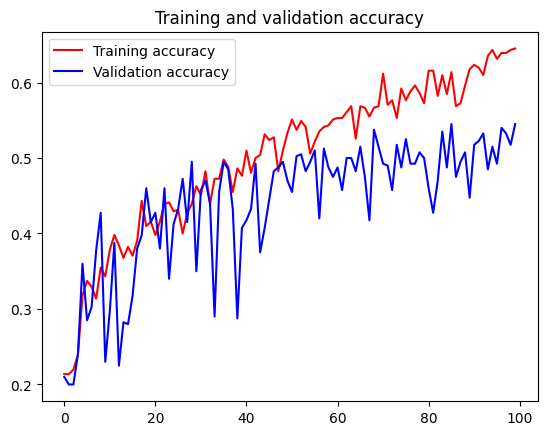

<Figure size 640x480 with 0 Axes>

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()



plt.show()

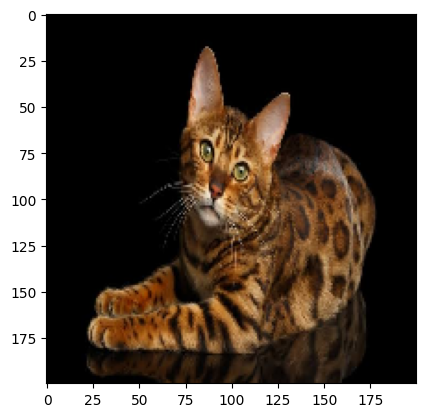

1/1 [==============================] - 0s 421ms/step
[[1. 0. 0. 0. 0.]]
It is a Bengal Cat


In [44]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt


class_labels = [ 'Bengal', 'Domestic Shorthair', 'Maine Coon','Ragdoll', 'Siamese']
 

img_path = r'C:\Users\User\Documents\ADA\CSCI4734_2024S_20252_PROJECT_TEAM11\images(bengal).jpeg'  # Replace with the path to your image file

img = image.load_img(img_path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

plt.imshow(img)
plt.show()


images = np.vstack([x])
predictions = model.predict(images, batch_size=10)
print(predictions)


predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
print(f'It is a {predicted_class_label} Cat')


In [45]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
